In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [4]:
df_input = pd.read_csv('CD_3D 0.4-0.9V_std', usecols=[1,2,3,4])

In [5]:
df_output = pd. read_csv('CD_3D 0.4-0.9V_std', usecols=[5])

In [6]:
df_input.shape

(93925, 4)

In [7]:
df_output.shape

(93925, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [9]:
print(x_train.shape,x_test.shape)

(84532, 4) (9393, 4)


In [10]:
x_train

,x座標,y座標,z座標,V[V]
8398,0.456952,1.169366,1.080976,-0.817875
3277,0.685325,0.154056,-1.080876,-1.462261
28643,1.142071,-1.661194,0.720667,-0.817875
75987,0.456952,-0.061312,-1.080876,1.115284
12282,1.484631,-0.799719,-1.080876,-0.817875
...,...,...,...,...
21243,-1.141660,-1.476592,-1.080876,-0.817875
45891,-1.141660,0.554027,1.080976,-0.173489
42613,-0.342354,-1.353525,-1.080876,-0.495682
43567,0.913698,1.569336,1.080976,-0.173489


In [11]:
y_train

,i[A/m^2]
8398,0.730300
3277,1.539501
28643,0.966690
75987,-1.153702
12282,0.940417
...,...
21243,0.970340
45891,0.148504
42613,0.462822
43567,0.079595


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  #重さを抽出（※始めに回すときだけ下の行と入れ替える）



model.add(Dense(units=32, input_shape=(4,), activation='tanh'))  
model.add(Dense(units=10, activation='tanh'))  #xとyが-1～1なのでtanh
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_squared_error',    #出力は連続値なので平均二乗誤差
              optimizer='adam',             #とりあえずadamで
              metrics=['mse'])

In [13]:
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mse',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001)
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mse",
                                              patience=100,
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])

Train on 84532 samples, validate on 9393 samples
Epoch 1/20000
84532/84532 [==============================] - 3s 33us/sample - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 4/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 5/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 9.0646e-04 - mse: 9.0646e-04 - val_loss: 9.1289e-04 - val_mse: 9.1289e-04
Epoch 6/20000
84532/84532 [==============================] - 1s 17us/sample - loss: 7.7274e-04 - mse: 7.7274e-04 - val_loss: 7.1430e-04 - val_mse: 7.1430e-04
Epoch 7/20000
84532/84532 [==============================] - 1s 15u

Epoch 53/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 5.8806e-05 - mse: 5.8806e-05 - val_loss: 5.4420e-05 - val_mse: 5.4420e-05
Epoch 54/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 5.8484e-05 - mse: 5.8484e-05 - val_loss: 5.1303e-05 - val_mse: 5.1303e-05
Epoch 55/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 5.7893e-05 - mse: 5.7893e-05 - val_loss: 5.2596e-05 - val_mse: 5.2596e-05
Epoch 56/20000
84532/84532 [==============================] - 1s 17us/sample - loss: 5.9498e-05 - mse: 5.9498e-05 - val_loss: 6.0305e-05 - val_mse: 6.0305e-05
Epoch 57/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 5.5400e-05 - mse: 5.5400e-05 - val_loss: 5.5513e-05 - val_mse: 5.5513e-05
Epoch 58/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 5.6667e-05 - mse: 5.6667e-05 - val_loss: 6.1403e-05 - val_mse: 6.1403e-05
Epoch 59/20000
84532/84532 [==================

84532/84532 [==============================] - 1s 15us/sample - loss: 2.0229e-05 - mse: 2.0229e-05 - val_loss: 1.7545e-05 - val_mse: 1.7545e-05
Epoch 156/20000
84532/84532 [==============================] - 1s 10us/sample - loss: 2.1085e-05 - mse: 2.1085e-05 - val_loss: 1.8547e-05 - val_mse: 1.8547e-05
Epoch 157/20000
84532/84532 [==============================] - 1s 12us/sample - loss: 1.9732e-05 - mse: 1.9732e-05 - val_loss: 1.6241e-05 - val_mse: 1.6241e-05
Epoch 158/20000
84532/84532 [==============================] - 1s 14us/sample - loss: 2.0877e-05 - mse: 2.0877e-05 - val_loss: 2.3350e-05 - val_mse: 2.3350e-05
Epoch 159/20000
84532/84532 [==============================] - 1s 14us/sample - loss: 1.8797e-05 - mse: 1.8797e-05 - val_loss: 1.7587e-05 - val_mse: 1.7587e-05
Epoch 160/20000
84532/84532 [==============================] - 1s 12us/sample - loss: 2.0324e-05 - mse: 2.0324e-05 - val_loss: 1.6369e-05 - val_mse: 1.6369e-05
Epoch 161/20000
84532/84532 [===========================

84532/84532 [==============================] - 1s 16us/sample - loss: 1.2700e-05 - mse: 1.2700e-05 - val_loss: 1.7651e-05 - val_mse: 1.7651e-05
Epoch 258/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 1.2692e-05 - mse: 1.2692e-05 - val_loss: 8.6450e-06 - val_mse: 8.6450e-06
Epoch 259/20000
84532/84532 [==============================] - 1s 10us/sample - loss: 1.3483e-05 - mse: 1.3483e-05 - val_loss: 1.3423e-05 - val_mse: 1.3423e-05
Epoch 260/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 1.1238e-05 - mse: 1.1238e-05 - val_loss: 1.3330e-05 - val_mse: 1.3330e-05
Epoch 261/20000
84532/84532 [==============================] - 1s 13us/sample - loss: 1.1822e-05 - mse: 1.1822e-05 - val_loss: 1.4717e-05 - val_mse: 1.4717e-05
Epoch 262/20000
84532/84532 [==============================] - 1s 13us/sample - loss: 1.3203e-05 - mse: 1.3203e-05 - val_loss: 1.4797e-05 - val_mse: 1.4797e-05
Epoch 263/20000
84532/84532 [===========================

84532/84532 [==============================] - 1s 14us/sample - loss: 1.2019e-05 - mse: 1.2019e-05 - val_loss: 7.8968e-06 - val_mse: 7.8968e-06
Epoch 360/20000
84532/84532 [==============================] - 1s 11us/sample - loss: 9.5403e-06 - mse: 9.5403e-06 - val_loss: 1.0897e-05 - val_mse: 1.0897e-05
Epoch 361/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 1.0887e-05 - mse: 1.0887e-05 - val_loss: 1.2538e-05 - val_mse: 1.2538e-05
Epoch 362/20000
84532/84532 [==============================] - 1s 11us/sample - loss: 9.9973e-06 - mse: 9.9973e-06 - val_loss: 2.3180e-05 - val_mse: 2.3180e-05
Epoch 363/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 1.0509e-05 - mse: 1.0509e-05 - val_loss: 9.4015e-06 - val_mse: 9.4015e-06
Epoch 364/20000
84532/84532 [==============================] - 1s 10us/sample - loss: 1.0765e-05 - mse: 1.0765e-05 - val_loss: 8.9298e-06 - val_mse: 8.9298e-06
Epoch 365/20000
84532/84532 [===========================

84532/84532 [==============================] - 1s 16us/sample - loss: 8.7500e-06 - mse: 8.7500e-06 - val_loss: 1.0388e-05 - val_mse: 1.0388e-05
Epoch 462/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 8.9874e-06 - mse: 8.9874e-06 - val_loss: 1.2380e-05 - val_mse: 1.2380e-05
Epoch 463/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 9.5095e-06 - mse: 9.5095e-06 - val_loss: 7.5106e-06 - val_mse: 7.5106e-06
Epoch 464/20000
84532/84532 [==============================] - 1s 12us/sample - loss: 8.5724e-06 - mse: 8.5724e-06 - val_loss: 7.9923e-06 - val_mse: 7.9923e-06
Epoch 465/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 9.6805e-06 - mse: 9.6805e-06 - val_loss: 6.1339e-06 - val_mse: 6.1339e-06
Epoch 466/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 9.2576e-06 - mse: 9.2576e-06 - val_loss: 6.1478e-06 - val_mse: 6.1478e-06
Epoch 467/20000
84532/84532 [===========================

84532/84532 [==============================] - ETA: 0s - loss: 7.7957e-06 - mse: 7.7957e-0 - 1s 16us/sample - loss: 7.7387e-06 - mse: 7.7387e-06 - val_loss: 5.6192e-06 - val_mse: 5.6192e-06
Epoch 564/20000
84532/84532 [==============================] - 1s 16us/sample - loss: 8.0886e-06 - mse: 8.0886e-06 - val_loss: 6.1418e-06 - val_mse: 6.1418e-06
Epoch 565/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 8.8713e-06 - mse: 8.8713e-06 - val_loss: 7.3405e-06 - val_mse: 7.3405e-06
Epoch 566/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.5585e-06 - mse: 7.5585e-06 - val_loss: 8.5723e-06 - val_mse: 8.5723e-06
Epoch 567/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 8.3259e-06 - mse: 8.3259e-06 - val_loss: 8.0303e-06 - val_mse: 8.0303e-06
Epoch 568/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.8980e-06 - mse: 7.8980e-06 - val_loss: 1.4193e-05 - val_mse: 1.4193e-05
Epoch 569/

84532/84532 [==============================] - 1s 15us/sample - loss: 7.5244e-06 - mse: 7.5244e-06 - val_loss: 8.4257e-06 - val_mse: 8.4257e-06
Epoch 615/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.5217e-06 - mse: 7.5217e-06 - val_loss: 7.8218e-06 - val_mse: 7.8218e-06
Epoch 616/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.6691e-06 - mse: 7.6691e-06 - val_loss: 5.8900e-06 - val_mse: 5.8900e-06
Epoch 617/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.2462e-06 - mse: 7.2462e-06 - val_loss: 7.7099e-06 - val_mse: 7.7099e-06
Epoch 618/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 8.7514e-06 - mse: 8.7514e-06 - val_loss: 7.8088e-06 - val_mse: 7.8088e-06
Epoch 619/20000
84532/84532 [==============================] - 1s 15us/sample - loss: 7.3715e-06 - mse: 7.3715e-06 - val_loss: 5.9856e-06 - val_mse: 5.9856e-06
Epoch 620/20000
84532/84532 [===========================

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse', 'lr'])

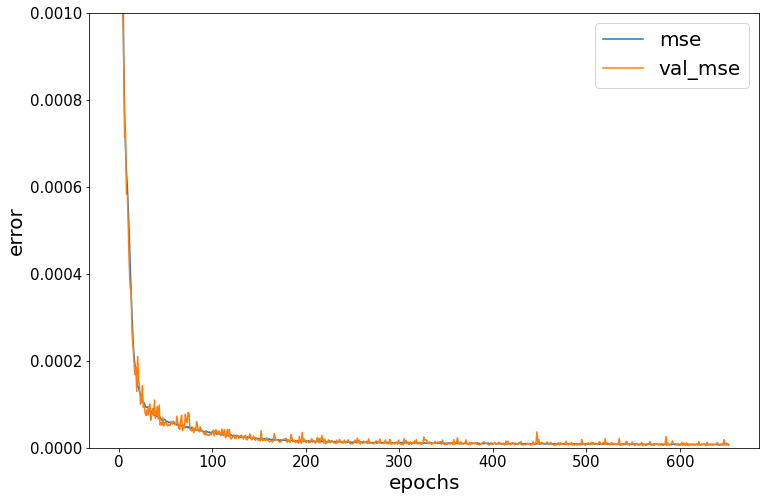

In [23]:
mse = history_dict['mse']
val_mse = history_dict['val_mse']
epochs = range(1, len(mse) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mse, label='mse')
plt.plot(epochs, val_mse, label='val_mse')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,0.001))
plt.legend(loc = 'best',fontsize=20)
plt.savefig('mse_transition.png')
plt.show()

In [26]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [27]:
model.save('i_predict CD_3D')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: i_predict CD_3D\assets
